In [ ]:
# install pymongo if not installed

#! pip install pymongo==3.11.3

In [ ]:
from pymongo import MongoClient
import pandas as pd

# connect to local mongodb and database test

MONGO_HOST= 'mongodb://localhost:27017/test'

client = MongoClient(MONGO_HOST)

# select database
db = client['test']

#select the collection within the database
collection = db.BLM

In [ ]:
# disply first document in the collection
result=collection.find()
result[0]

ServerSelectionTimeoutError: ignored

In [ ]:
# create a pipeline to extract certain fields

pipeline =[
   {"$project": {
   "tweet_id": "$id_str",
    "created_at":1,
    "user_name":"$user.name",
    "user_screenName": "$user.screen_name",
    "text":1,
    "source":1,
    "place":1,
     "lang":1,
     "_id":0
  }
  }
]

result=collection.aggregate(pipeline)

result_list=[]  # create an array to store the result

for res in result:
    #print(res)
    result_list.append(res)

result_list

# convert result list into pandas data frame

result_pd = pd.DataFrame(list(result_list))

result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLives...,"<a href=""https://missionimproxyble.com"" rel=""n...",None,it,1499797053228171265,JFSebastian146,JFSebastian146
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on...,"<a href=""http://twitter.com/download/android"" ...",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist po...,"<a href=""http://twitter.com/download/iphone"" r...",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he step...,"<a href=""http://twitter.com/download/iphone"" r...",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in R...,"<a href=""http://twitter.com/download/android"" ...",None,en,1499797095070330880,dm.,dmlllov4


## Sentiment Analysis

In this next block of code we will cycle through all the tweets and score the tweet text using the VADER Sentiment library. See: https://pypi.org/project/vaderSentiment/

In [ ]:
#! pip install vaderSentiment==3.3.2

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = []
analyzer = SentimentIntensityAnalyzer()

for index, row in result_pd.iterrows():
    tweet = str(row['text'])
    vs = analyzer.polarity_scores(tweet)
    sentiment.append(vs)

result_pd['VaderSentiment'] = sentiment

In [ ]:
result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLives...,"<a href=""https://missionimproxyble.com"" rel=""n...",None,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on...,"<a href=""http://twitter.com/download/android"" ...",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist po...,"<a href=""http://twitter.com/download/iphone"" r...",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp..."
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he step...,"<a href=""http://twitter.com/download/iphone"" r...",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou..."
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in R...,"<a href=""http://twitter.com/download/android"" ...",None,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'comp..."


In [ ]:
# Now let's change the setting so a print will show all of the columns, change the column max width so we can see the whole
# tweet, and show up to 100 rows
pd.set_option('display.max_columns', None) # This will make it so all columns appear when printing
pd.options.display.max_colwidth = 300  # This makes it so we can see the entire tweet text.
pd.set_option('display.max_rows', 10)

In [ ]:
result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLivesMatter,"<a href=""https://missionimproxyble.com"" rel=""nofollow"">My1stNewApp</a>",None,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on colonialist with their white male American heterosexual “lesbian” speaker 🤦‍♀️\n\nA man who ap…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist police?,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}"
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he stepped on their Defund Police attack.,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}"
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in Russia for protesting the war is obvious evidence of an authoritarian police state where disse…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.8934}"


In [ ]:
# extract compound value for the VaderSentiment

result_pd['compound'] = result_pd['VaderSentiment'].apply(pd.Series)['compound']

In [ ]:
result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment,compound
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLivesMatter,"<a href=""https://missionimproxyble.com"" rel=""nofollow"">My1stNewApp</a>",None,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on colonialist with their white male American heterosexual “lesbian” speaker 🤦‍♀️\n\nA man who ap…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist police?,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}",-0.6124
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he stepped on their Defund Police attack.,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}",-0.5423
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in Russia for protesting the war is obvious evidence of an authoritarian police state where disse…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.8934}",-0.8934


In [ ]:
result_pd['compound'].mean()

-0.10187884199146255

In [ ]:
result_pd['compound'].describe()

count    358063.000000
mean         -0.101879
std           0.443335
min          -0.995600
25%          -0.449700
50%           0.000000
75%           0.051600
max           0.999500
Name: compound, dtype: float64

In [ ]:
# Classify compound score into positive, neutral and negative

def sent_classify(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

result_pd['sentiment'] = result_pd['compound'].apply(sent_classify)

In [ ]:
result_sent = result_pd.groupby('sentiment')['sentiment'].count()

In [ ]:
result_sent.head()

sentiment
Negative    151386
Neutral     102520
Positive    104157
Name: sentiment, dtype: int64

In [ ]:
result_sent2 = result_sent.rename("totalTweets").reset_index()

result_sent2.head()

,sentiment,totalTweets
0,Negative,151386
1,Neutral,102520
2,Positive,104157


In [ ]:
# visualize the result
# Pie Chart?

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

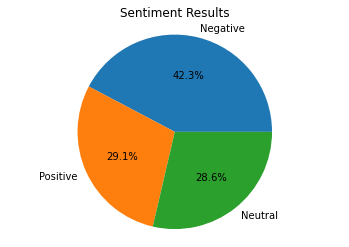

In [ ]:
sizes = result_pd['sentiment'].value_counts()
labels = ['Negative', 'Positive', 'Neutral']

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Sentiment Results')


plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='totalTweets'>

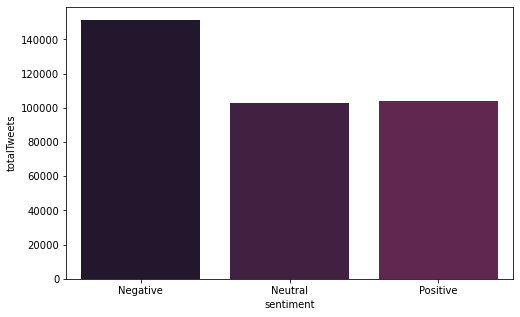

In [ ]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8,5))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)

# plot a bar chart
sns.barplot(
    x = "sentiment",
    y = "totalTweets",
    data = result_sent2,
    palette = palette)

# Gender Guesser

In this section we will guess a persons gender based off of their first name. We split the name using the first space found into a first and last name.

In [ ]:
# You only need to run this once then comment out the code.
!pip install gender_guesser

In [ ]:
# This splits the name field into two different fields and saves it in a new dataframe
names = result_pd["user_name"].str.split(" ", n = 1, expand = True)
names.head(10)

,0,1
0,JFSebastian146,None
1,🇺🇸🇺🇦✨Juniper,Stands With Ukraine✨🇺🇦🇺🇸
2,#VoteBlue22,🇺🇸
3,#RandyResistING,Authoritarianism
4,dm.,None
5,alan,dobson
6,Florina,Rodov
7,"Karen,",but not a Karen
8,salix⁷,✦ 💙💛
9,Truth,First


In [ ]:
# This creates a new field in the original dataframe using the first column in the names dataframe
result_pd['First'] = names[0]

result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment,compound,sentiment,First
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLivesMatter,"<a href=""https://missionimproxyble.com"" rel=""nofollow"">My1stNewApp</a>",None,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,JFSebastian146
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on colonialist with their white male American heterosexual “lesbian” speaker 🤦‍♀️\n\nA man who ap…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,🇺🇸🇺🇦✨Juniper
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist police?,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}",-0.6124,Negative,#VoteBlue22
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he stepped on their Defund Police attack.,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}",-0.5423,Negative,#RandyResistING
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in Russia for protesting the war is obvious evidence of an authoritarian police state where disse…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.8934}",-0.8934,Negative,dm.


In [ ]:
import gender_guesser.detector as gender

d = gender.Detector()

In [ ]:
# DONT RUN THIS WITH YOUR FULL DATA!!! THIS IS FOR DEMO PURPOSES ONLY AND DOES NOT HAVE TO BE RUN
# Here we are looping through all the records and displaying the first name along with the "guessed" gender
for index, row in result_pd[0:10].iterrows():
    print(row['First'], d.get_gender(row['First']))

JFSebastian146 unknown
🇺🇸🇺🇦✨Juniper unknown
#VoteBlue22 unknown
#RandyResistING unknown
dm. unknown
alan unknown
Florina female
Karen, unknown
salix⁷ unknown
Truth unknown


In [ ]:
# Let's rerun it and save the guessed gender back to the dataframe
genderguess = []

for index, row in result_pd.iterrows():
    genderguess.append(d.get_gender(row['First']))

result_pd['gender'] = genderguess

result_pd.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment,compound,sentiment,First,gender
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLivesMatter,"<a href=""https://missionimproxyble.com"" rel=""nofollow"">My1stNewApp</a>",None,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,JFSebastian146,unknown
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on colonialist with their white male American heterosexual “lesbian” speaker 🤦‍♀️\n\nA man who ap…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,🇺🇸🇺🇦✨Juniper,unknown
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist police?,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}",-0.6124,Negative,#VoteBlue22,unknown
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he stepped on their Defund Police attack.,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}",-0.5423,Negative,#RandyResistING,unknown
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in Russia for protesting the war is obvious evidence of an authoritarian police state where disse…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.8934}",-0.8934,Negative,dm.,unknown


In [ ]:
result_pd['gender'].value_counts()

unknown          246347
male              58617
female            37514
mostly_female      7420
mostly_male        5286
andy               2879
Name: gender, dtype: int64

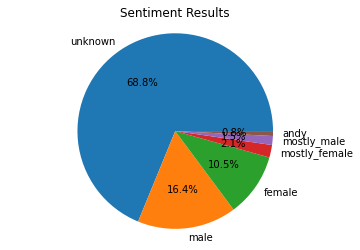

In [ ]:
sizes = result_pd['gender'].value_counts()
labels = ['unknown', 'male', 'female', 'mostly_female', 'mostly_male', 'andy']

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Sentiment Results')


plt.show()

<AxesSubplot:xlabel='gender', ylabel='compound'>

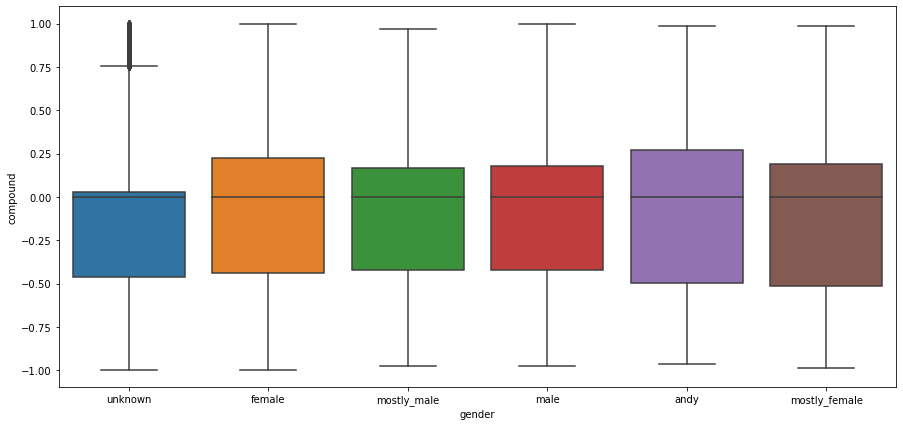

In [ ]:
# let see whether sentiment differs by gender

# Set the figure size
plt.figure(figsize=(15, 7))


sns.boxplot(x='gender', y='compound', data=result_pd)

In [ ]:
# save the result in a csv file at current directoy

result_pd.to_csv("BLM.csv", sep="|", index=False)

In [ ]:
import os
os. getcwd()

'C:\\Users\\student\\isa360_spring2022'

In [ ]:
df = pd.read_csv("BLM.csv", sep="|")

In [ ]:
df.head()

,created_at,text,source,place,lang,tweet_id,user_name,user_screenName,VaderSentiment,compound,sentiment,First,gender
0,Fri Mar 04 17:20:57 +0000 2022,RT @say_the_names: Maurice Granton #BlackLivesMatter,"<a href=""https://missionimproxyble.com"" rel=""nofollow"">My1stNewApp</a>",NaN,it,1499797053228171265,JFSebastian146,JFSebastian146,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,JFSebastian146,unknown
1,Fri Mar 04 17:21:03 +0000 2022,RT @HanoverHussy: #LesbianLives2022 go full on colonialist with their white male American heterosexual “lesbian” speaker 🤦‍♀️\n\nA man who ap…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,en,1499797080113651716,🇺🇸🇺🇦✨Juniper Stands With Ukraine✨🇺🇦🇺🇸,JunipersBird,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,🇺🇸🇺🇦✨Juniper,unknown
2,Fri Mar 04 17:21:03 +0000 2022,@KariLake Can we at least defund the racist police?,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,en,1499797081342365697,#VoteBlue22 🇺🇸,heyjolly,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}",-0.6124,Negative,#VoteBlue22,unknown
3,Fri Mar 04 17:21:04 +0000 2022,They stayed seated and stunned because he stepped on their Defund Police attack.,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,en,1499797085645848578,#RandyResistING Authoritarianism,RandyResist,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}",-0.5423,Negative,#RandyResistING,unknown
4,Fri Mar 04 17:21:07 +0000 2022,RT @transscribe: 6700 protesters arrested in Russia for protesting the war is obvious evidence of an authoritarian police state where disse…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,en,1499797095070330880,dm.,dmlllov4,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.8934}",-0.8934,Negative,dm.,unknown
